In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist=fetch_openml("mnist_784")

In [5]:
mnist.target=mnist.target.astype(np.int8)

In [6]:
x,y=mnist["data"],mnist["target"]

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
x[100]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [10]:
y[100]

5

In [11]:
import matplotlib.pyplot as plt

some_digit=x[100]
some_digit_image=some_digit.reshape(28,28) #converting 1d array into square matrix
import matplotlib
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)


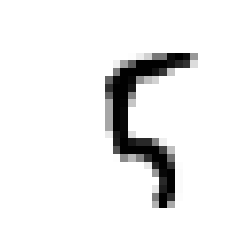

In [12]:
import matplotlib
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()

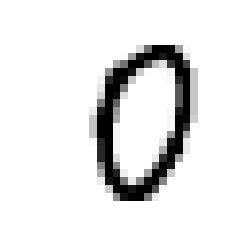

In [16]:
some_digit=x[1000]
some_digit_image=some_digit.reshape(28,28) #converting 1d array into square matrix
import matplotlib
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
plt.axis("off") #removing axis
plt.show()

In [17]:
x_train,x_test=x[:60000],x[60000:]
y_train,y_test=y[:60000],y[60000:]

In [18]:
len(x_train)

60000

In [19]:
y_train[4]

9

In [20]:
shuffle_index=np.random.permutation(60000)

In [21]:
x_train=x_train[shuffle_index]
y_train=y_train[shuffle_index]

In [21]:
y_train[4]

6

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
sgd_clf=SGDClassifier(random_state=0)

In [24]:
sgd_clf.fit(x_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
sgd_clf.predict([some_digit])


array([0], dtype=int8)

In [26]:
import warnings

warnings.simplefilter(action='ignore',category=FutureWarning)

from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=0)
sgd_clf.fit(x_train,y_train)



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
from sklearn.model_selection import cross_val_predict #k fold method, stratified k fold
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train,cv=3)

In [28]:
len(y_train_pred)

60000

In [29]:
from sklearn import metrics                          #from sklearn.metrics import confusion_matrix
cm=metrics.confusion_matrix(y_train,y_train_pred) #cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[5666,    0,   47,   17,   10,   40,   64,    4,   64,   11],
       [   1, 6330,  109,   25,    9,   38,    8,   17,  179,   26],
       [  42,   33, 5373,   78,   70,   48,   61,   56,  168,   29],
       [  38,   25,  337, 5071,    7,  274,   45,   63,  144,  127],
       [  21,   22,   63,   33, 5178,   51,   37,   20,  123,  294],
       [  83,   12,   76,  342,   61, 4407,  111,   18,  237,   74],
       [  50,   11,  152,   10,   47,  112, 5466,    2,   62,    6],
       [  33,   18,  160,   62,   60,   23,    4, 5484,   45,  376],
       [  49,   98,  284,  203,   55,  391,   44,   22, 4512,  193],
       [  32,   17,   50,  126,  195,   99,    4,  247,   79, 5100]],
      dtype=int64)

In [34]:
print("Accuracy:",metrics.accuracy_score(y_train,y_train_pred)     #TN  FP     ACCU = (TN+TP)/TN+FP+FN+TP
# print("Precision:",metrics.precision_score(y_train,y_train_pred)    #FN  TP     PRE = TP/(TP+FN)
# print("Recall:",metrics.recall_score(y_train,y_train_pred)     

SyntaxError: unexpected EOF while parsing (<ipython-input-34-8fe7e02d38bb>, line 3)

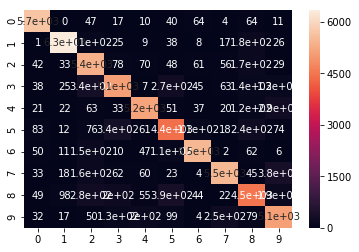

In [35]:
import seaborn as sn      #graphical representation of confusion matrix
sn.heatmap(cm,annot=True)
plt.show()

In [ ]:
#confusion matrix for y_train (10 x 10) and not y_train_5

#for loan data
#LINEAR MULTILINEAR - credit score, loan amount, kitne % interest pe loan milega? (through multilinear regression)
#lOGISTIC- will get, or not?